# Supervised Learning - Telco Customer Churn

## Introduction
* The main goal of this project is to build a model using different Supervised Learning algorithms using the dataset: *Sample Telco Customer Churn Dataset*.
* After analyzing our dataset and applying these algorithms, we want our model to be able to predict if a customer is likely to be lost to a competitor.

## Dataset
* The dataset is composed by the following columns:
    * customerID: A unique ID that identifies each customer.
    * gender: The customer’s gender: Male (1), Female (0).
    * SeniorCitizen: Indicates if the customer is 65 or older: No (0), Yes (1).
    * Partner: Service contract is resold by the partner: No (0), Yes (1).
    * Dependents: Indicates if the customer lives with any dependents: No (0), Yes (1).
    * Tenure: Indicates the total amount of months that the customer has been with the company.
    * PhoneService: Indicates if the customer subscribes to home phone service with the company: No (0), Yes (1).
    * MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: No (0), Yes (1).
    * InternetService: Indicates if the customer subscribes to Internet service with the company: No (0), DSL (1), Fiber optic (2).
    * OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: No (0), Yes (1), NA (2).
    * OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: No (0), Yes (1), NA (2).
    * DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: No (0), Yes (1), NA (2).
    * TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: No (0), Yes (1), NA (2).
    * StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: No (0), Yes (1), NA (2). The company does not charge an additional fee for this service.
    * StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: No (0), Yes (1), NA (2). The company does not charge an additional fee for this service.
    * Contract: Indicates the customer’s current contract type: Month-to-Month (0), One Year (1), Two Year (2).
    * PaperlessBilling: Indicates if the customer has chosen paperless billing: No (0), Yes (1).
    * PaymentMethod: Indicates how the customer pays their bill: Bank transfer - automatic (0), Credit card - automatic (1), Electronic cheque (2), Mailed cheque (3).
    * MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
    * TotalCharges: Indicates the customer’s total charges.
    * Churn: Indicates if the customer churn or not: No (0), Yes (1).

## Development
* To predict likelihood of a costumer leaving the service, we used four different algorithms for our model: Decision Trees, Support Vector Regression (SVR), K-Nearest Neighbors and Neural Networks (Multi-layer Perceptron).
* After making the predictions, a smaller sample of data is used in order to estimate how the models are expected to perform in general when used to make predictions on data not used during the training of these models.

## Data pre-processing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing, linear_model, neighbors
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
import time

%matplotlib inline

# import data
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2.csv')

input_names = list(churn_data.columns)

all_inputs = churn_data[input_names].values

# set target data
churn_target = churn_data.iloc[:,-1]

# set feature data
churn_data.drop(["customerID","Churn"], axis=1, inplace=True)

# set training and test variables
X = np.array(churn_data)
y = np.array(churn_target)

# set variables for target and features
features = list(churn_data)
targets = list(churn_target)

# divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# set seaborn style and fontsize
sb.set_style('ticks')
sb.set_context('paper', font_scale=1.6)

# data normalization
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Decision Trees - Gini criterion

### Training time and accuracy - Gini

In [4]:
#define the model
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3)

# fit the model and time it
start = time.time()

clf_gini.fit(X_train, y_train)

stop = time.time()

training_gini = stop - start
print(f"Training: {training_gini} seconds")

# get predicted values
y_pred_gini = clf_gini.predict(X_test)

# get accuracy
accuracy_gini = accuracy_score(y_test,y_pred_gini)*100
print (f"Accuracy : {accuracy_gini}%")

Training: 0.009987354278564453 seconds
Accuracy : 78.70722433460075%


### Feature Importance - Gini

<AxesSubplot:>

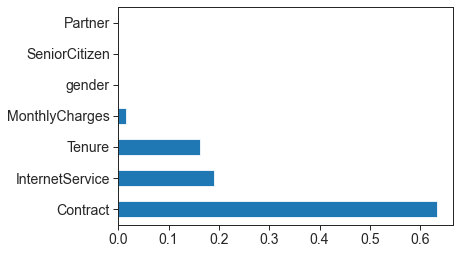

In [5]:
# get feature importance
importances_gini = clf_gini.feature_importances_

# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feat_importances_gini = pd.Series(importances_gini, index=churn_data.columns)
feat_importances_gini.nlargest(7).plot(kind='barh')

### Confusion Matrix - Gini

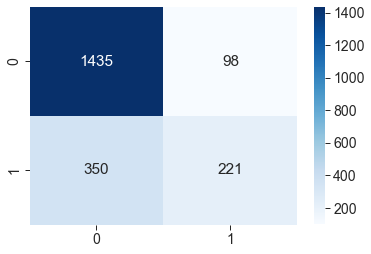

In [6]:
# plot confusion matrix
confusion_matrix_gini = sb.heatmap(confusion_matrix(y_test, y_pred_gini),annot=True,cmap='Blues', fmt='g')

### Classification Report - Gini

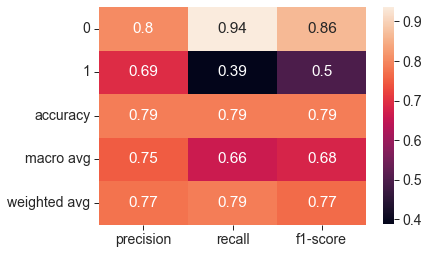

In [7]:
# plot classification report
clf_report_gini = classification_report(y_test, 
                                   y_pred_gini,
                                   output_dict=True)
classification_report_gini = sb.heatmap(pd.DataFrame(clf_report_gini).iloc[:-1, :].T, annot=True)

### Decision Tree plot - Gini

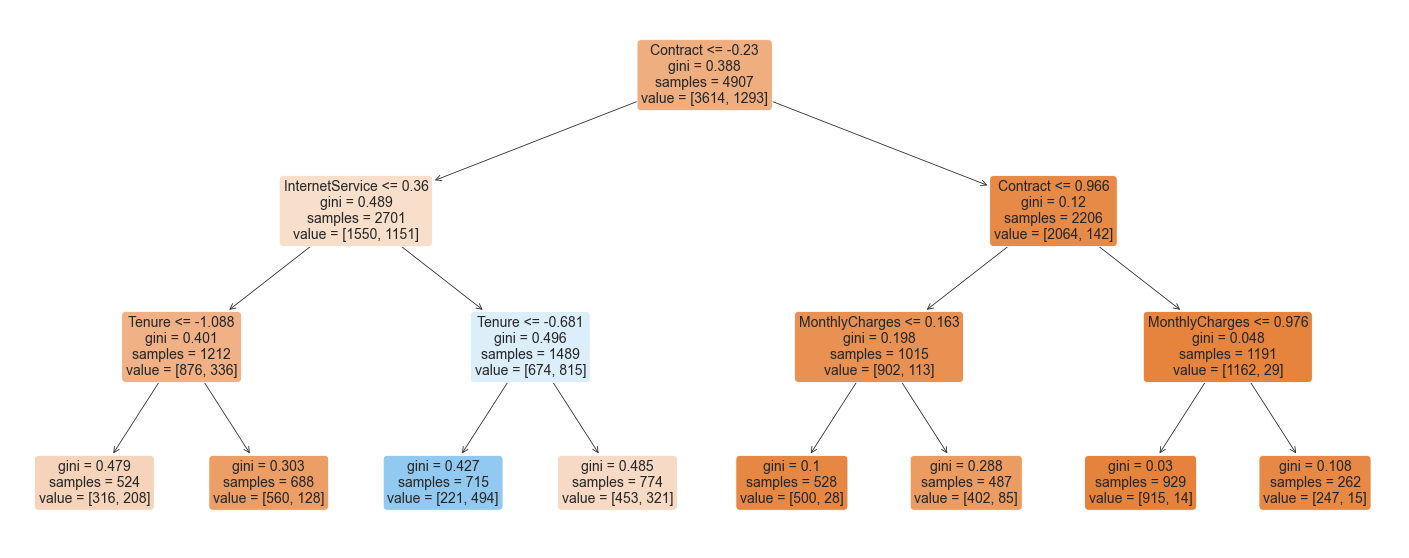

In [8]:
# plot decision tree
plt.figure(figsize=(25,10))
plot_tree_gini = plot_tree(clf_gini, 
              feature_names=features, 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Decision Trees - Entropy criterion

### Training time and Accuracy - Entropy

In [9]:
#define the model
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# fit the model and time it
start = time.time()

clf_entropy.fit(X_train, y_train)

stop = time.time()

training_entropy = stop - start
print(f"Training: {training_entropy} seconds")

# get predicted values
y_pred_entropy = clf_entropy.predict(X_test)

# get accuracy
accuracy_entropy = accuracy_score(y_test,y_pred_entropy)*100
print (f"Accuracy : {accuracy_entropy}%")


Training: 0.014852762222290039 seconds
Accuracy : 78.70722433460075%


### Feature Importance - Entropy

<AxesSubplot:>

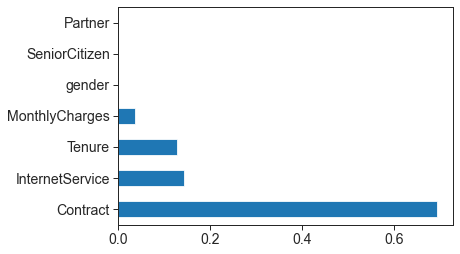

In [10]:
# get feature importance
importances_entropy = clf_entropy.feature_importances_

# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feat_importances_entropy = pd.Series(importances_entropy, index=churn_data.columns)
feat_importances_entropy.nlargest(7).plot(kind='barh')

### Confusion Matrix - Entropy

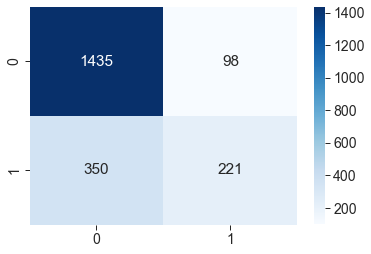

In [11]:
# plot confusion matrix
confusion_matrix_entropy = sb.heatmap(confusion_matrix(y_test, y_pred_entropy),annot=True,cmap='Blues', fmt='g')

### Classification Report - Entropy

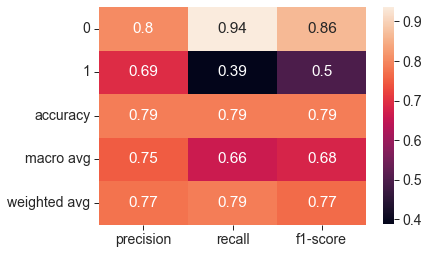

In [12]:
# plot classification report
clf_report_entropy = classification_report(y_test, 
                                   y_pred_entropy,
                                   output_dict=True)
classification_report_entropy = sb.heatmap(pd.DataFrame(clf_report_entropy).iloc[:-1, :].T, annot=True)

### Decision Tree plot - Entropy

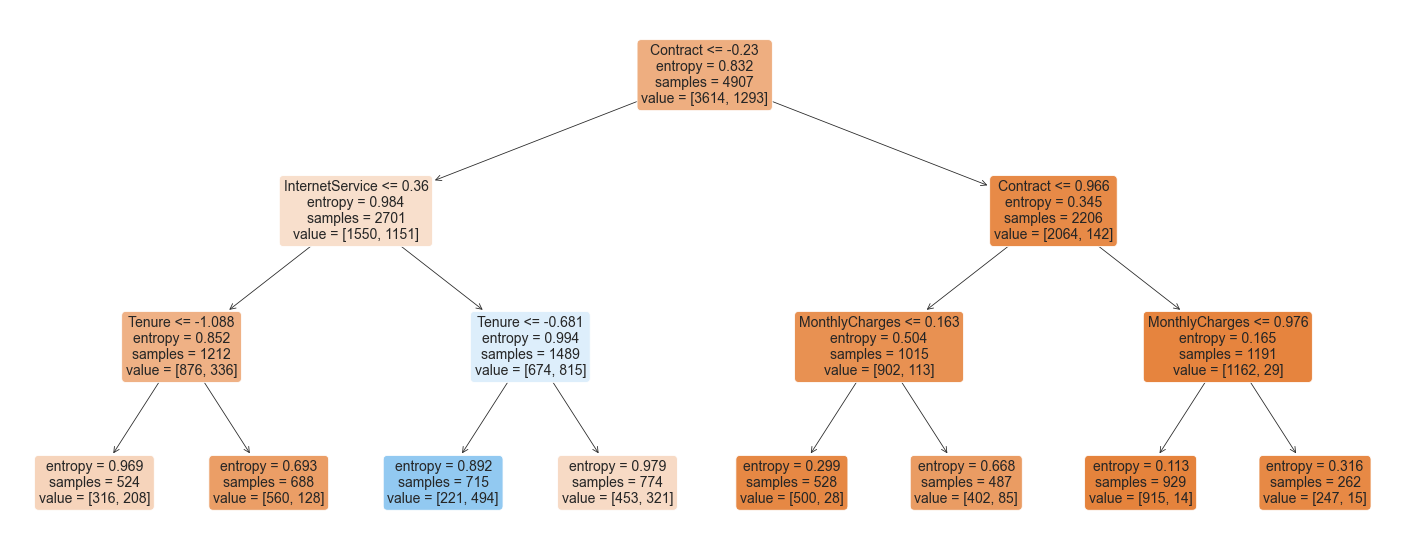

In [13]:
# plot decision tree
plt.figure(figsize=(25,10))
plot_tree_entropy = plot_tree(clf_entropy, 
              feature_names=features, 
              filled=True, 
              rounded=True, 
              fontsize=14)

## K-Nearest Neighbor

### Training time and Accuracy

In [14]:
# initialize the class with the number of neighbours wanted
clf_knn = KNeighborsClassifier(n_neighbors=5)

#fit the model and time it
start = time.time()

clf_knn.fit(X_train, y_train)

stop = time.time()

training_knn = stop - start
print(f"Training: {training_knn} seconds")
print()

# Validate the classifier on the testing set using classification accuracy
clf_knn.score(X_train, y_train)

# get predicted values
y_pred_knn = clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test,y_pred_knn)*100
print (f"Accuracy: {accuracy_knn}%")
print()

Training: 0.001528024673461914 seconds

Accuracy: 75.09505703422053%



### Confusion Matrix

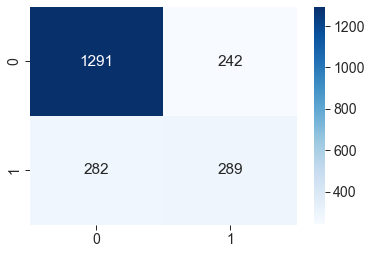

In [15]:
# plot confusion matrix
confusion_matrix_knn = sb.heatmap(confusion_matrix(y_test, y_pred_knn),annot=True,cmap='Blues', fmt='g')

### Classification Report

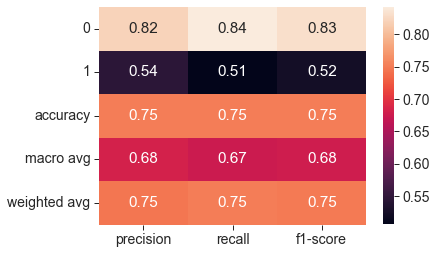

In [16]:
# plot classification report
clf_report_knn = classification_report(y_test,
                                   y_pred_knn,
                                   output_dict=True)
classification_report_knn = sb.heatmap(pd.DataFrame(clf_report_knn).iloc[:-1, :].T, annot=True)

### Error rate for K value
* We tried different number of neighbours in order to find out which one was less error-prone.

Best number of neighbours: 50
Min error value: 0.21245247148288973


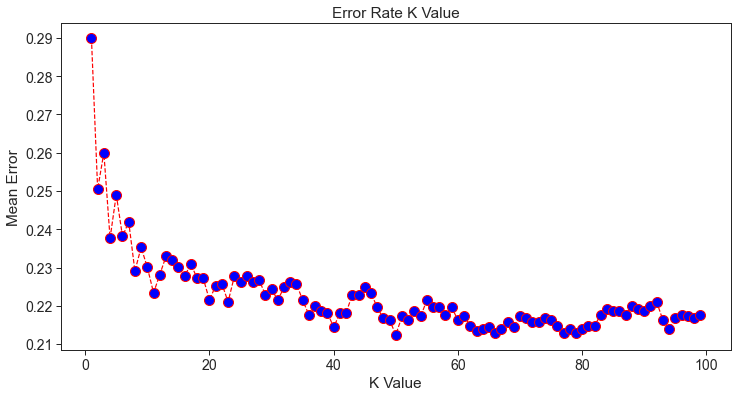

In [20]:
error = []

min = 1
bestNeighbours = 0

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    if(min > np.mean(pred_i != y_test)):
        min = np.mean(pred_i != y_test)
        bestNeighbours = i


plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

print(f'Best number of neighbours: {bestNeighbours}' )
print(f'Min error value: {min}')

### Testing different classifiers
* We used different weights and algorithms in order to find out the best classifier

In [27]:

parameter_grid = {'n_neighbors': [50],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid=parameter_grid,
                           cv=10)

all_inputs = churn_data.values
all_labels = churn_target.values

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7817712588040691
Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'distance'}


### Best classifier

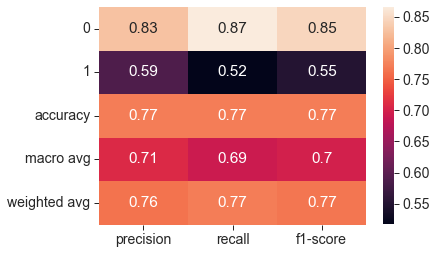

In [28]:
best_clf_knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=50, weights='distance')

# Train the classifier on the training set
best_clf_knn.fit(X_train, y_train)
best_predictions = best_clf_knn.predict(X_test)

# plot classification report
best_clf_report_knn = classification_report(y_test,
                                   best_predictions,
                                   output_dict=True)
best_classification_report_knn = sb.heatmap(pd.DataFrame(best_clf_report_knn).iloc[:-1, :].T, annot=True)

## Support Vector Machines

### Training time and Accuracy

In [ ]:
#create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#fit the model and time it
start = time.time()

#train the model using the training sets
clf_svm.fit(X_train, y_train)

stop = time.time()

training_svm = stop - start
print(f"Training: {stop - start} seconds")

#predict the response for test dataset
y_pred_svm = clf_svm.predict(X_test)

# get accuracy
accuracy_svm = accuracy_score(y_test,y_pred_svm)*100
print (f"Accuracy : {accuracy_svm}%")

### Confusion Matrix

In [ ]:
# plot confusion matrix
confusion_matrix_svm = sb.heatmap(confusion_matrix(y_test, y_pred_svm),annot=True,cmap='Blues', fmt='g')

### Classification Report

In [ ]:
# plot classification report
clf_report_svm = classification_report(y_test,
                                   y_pred_svm,
                                   output_dict=True)
classification_report_svm = sb.heatmap(pd.DataFrame(clf_report_svm).iloc[:-1, :].T, annot=True)

### Plot

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting our two-features-space
sb.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8)

# Constructing a hyperplane using a formula.
w = clf_svm.coef_[0]           # w consists of 2 elements
b = clf_svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

# Encircle support vectors
plt.scatter(clf_svm.support_vectors_[:, 0],
            clf_svm.support_vectors_[:, 1],
            s=19,
            facecolors='none',
            edgecolors='k',
            alpha=.5)

# Step 2 (unit-vector):
w_hat = clf_svm.coef_[0] / (np.sqrt(np.sum(clf_svm.coef_[0] ** 2)))

# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(clf_svm.coef_[0] ** 2))

# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Plot margin lines# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)

## Stochastic Gradient Descent

In [ ]:
#create a svm Classifier
clf_sgc = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)

#fit the model and time it
start = time.time()

#train the model using the training sets
clf_sgc.fit(X_train, y_train)

stop = time.time()

training_sgc = stop - start
print(f"Training: {stop - start} seconds")

#predict the response for test dataset
y_pred_sgc = clf_svm.predict(X_test)

# get accuracy
accuracy_sgc = accuracy_score(y_test,y_pred_sgc)*100
print (f"Accuracy : {accuracy_sgc}%")

## Neural Network - Multi-layer Perceptron

In [ ]:
#create a svm Classifier
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 1000)

#fit the model and time it
start = time.time()

#train the model using the training sets
clf_mlp.fit(X_train, y_train)

stop = time.time()

training_mlp = stop - start
print(f"Training: {stop - start} seconds")

#predict the response for test dataset
y_pred_mlp = clf_mlp.predict(X_test)

# get accuracy
accuracy_mlp = accuracy_score(y_test,y_pred_mlp)*100
print (f"Accuracy : {accuracy_mlp}%")

In [ ]:
#create a sgd Classifier
clf_sgc = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)

#fit the model and time it
start = time.time()

#train the model using the training sets
clf_sgc.fit(X_train, y_train)

stop = time.time()

training_sgc = stop - start
print(f"Training: {stop - start} seconds")

#predict the response for test dataset
y_pred_sgc = clf_svm.predict(X_test)

# get accuracy
accuracy_sgc = accuracy_score(y_test,y_pred_sgc)*100
print (f"Accuracy : {accuracy_sgc}%")

## Neural Network - Multi-layer Perceptron

In [ ]:
#create a mlp Classifier
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 1000)

#fit the model and time it
start = time.time()

#train the model using the training sets
clf_mlp.fit(X_train, y_train)

stop = time.time()

training_mlp = stop - start
print(f"Training: {stop - start} seconds")

#predict the response for test dataset
y_pred_mlp = clf_mlp.predict(X_test)

# get accuracy
accuracy_mlp = accuracy_score(y_test,y_pred_mlp)*100
print (f"Accuracy : {accuracy_mlp}%")